In [33]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

In [34]:
#データの読み込み
df_train = pd.read_csv('train.csv')
#読み込んだデータの確認
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
#各行・列ごとに欠損値を一つでも含むか確認
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
#Sexをダミー化する
sex_dum = pd.get_dummies(df_train['Sex'])
print(sex_dum)

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]


In [37]:
#ダミー化したデータをdf_trainに加える
df_train_proc = pd.concat((df_train,sex_dum),axis=1)
df_train_proc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [38]:
#Sexカラムを消す
df_train_proc = df_train_proc.drop('Sex',axis=1)

#femaleカラムを消す
df_train_proc = df_train_proc.drop('female',axis=1)

In [39]:
#Embarkedをダミー化する
emb_dum = pd.get_dummies(df_train['Embarked'])
df_train_proc = pd.concat((df_train_proc,emb_dum),axis=1)
df_train_proc = df_train_proc.drop('Embarked',axis=1)
df_train_proc = df_train_proc.drop('S',axis=1)
df_train_proc.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0


In [40]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
#Cabinは欠損が多いから一回落としてみる、非構造データであるNameもTicketも落とす
df_train_proc_dn = df_train_proc.dropna()
df_train_proc_dn = df_train_proc_dn.drop('PassengerId',axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Name',axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Ticket',axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Cabin',axis=1)

#データを落としたらSurvivedに対する相関関係を見る
df_train_proc_dn.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q
Survived,1.000000,-0.037227,-0.244604,0.100339,0.018723,0.134019,-0.535727,0.098712,-0.039232
Pclass,-0.037227,1.000000,-0.307590,-0.100324,0.049894,-0.315069,-0.041725,-0.228001,-0.038676
Age,-0.244604,-0.307590,1.000000,-0.161625,-0.274813,-0.091542,0.172307,0.076824,0.017855
SibSp,0.100339,-0.100324,-0.161625,1.000000,0.258993,0.285492,-0.095344,-0.050628,0.169778
Parch,0.018723,0.049894,-0.274813,0.258993,1.000000,0.388783,-0.081832,-0.068949,-0.065543
Fare,0.134019,-0.315069,-0.091542,0.285492,0.388783,1.000000,-0.129871,0.239531,0.015604
male,-0.535727,-0.041725,0.172307,-0.095344,-0.081832,-0.129871,1.000000,-0.053879,-0.002826
C,0.098712,-0.228001,0.076824,-0.050628,-0.068949,0.239531,-0.053879,1.000000,-0.076941
Q,-0.039232,-0.038676,0.017855,0.169778,-0.065543,0.015604,-0.002826,-0.076941,1.000000


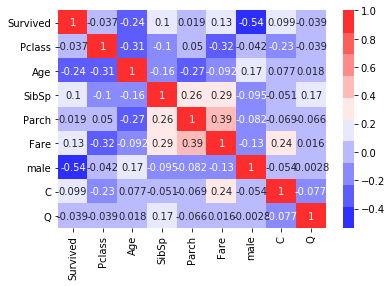

In [44]:
#視覚化する
#このときTitanicという環境にseabornを入れていなかったのでエラーはいた
#base環境で実行していた
#プロンプトにbaseと書いてあるのでconda activate 環境名で環境を変更
#pipとcondaは違うので気をつける
import seaborn as sns
sns.heatmap(df_train_proc_dn.corr(),cmap=sns.color_palette('bwr',10),annot=True)

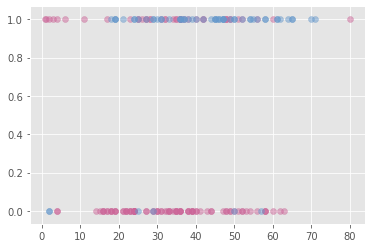

In [46]:
#Survivedとmaleの間には-0.54程度の負の相関がある
#ついでSurvivedとAgeの間には-0.24程度の負の相関がある
#性別と年齢ごとの生存を可視化してみる
plt.style.use('ggplot')

#Survivedが1のやつをいれる
df_train_sur = df_train_proc_dn[df_train_proc_dn.Survived==1]
#Ageカラムだけを入れる
df_train_sur_age = df_train_sur.iloc[:,2]
#maleカラムだけを入れる
df_train_sur_s = df_train_sur.iloc[:,6]
#散布図として表示
plt.scatter(df_train_sur_age,df_train_sur_s,color='#cc6699',alpha=0.5)

#Survivedが0のやつをいれる
df_train_sur = df_train_proc_dn[df_train_proc_dn.Survived==0]
#Ageカラムだけを入れる
df_train_sur_age = df_train_sur.iloc[:,2]
#maleカラムだけを入れる
df_train_sur_s = df_train_sur.iloc[:,6]
plt.scatter(df_train_sur_age,df_train_sur_s,color='#6699cc',alpha=0.5)

plt.show()

In [ ]:
#mr,master,mrs,ms
def name_classifier(name_df):    
    name_class_df = pd.DataFrame(columns={'miss','mrs','master','mr'})
    
    for name in name_df:        
        if 'Miss' in name:
            df = pd.DataFrame([[1,0,0,0]],columns={'miss','mrs','master','mr'})
        elif 'Mrs' in name:
            df = pd.DataFrame([[0,1,0,0]],columns={'miss','mrs','master','mr'})
        elif 'Master' in name:
            df = pd.DataFrame([[0,0,1,0]],columns={'miss','mrs','master','mr'})
        elif 'Mr' in name:
            df = pd.DataFrame([[0,0,0,1]],columns={'miss','mrs','master','mr'})
        else :
            df = pd.DataFrame([[0,0,0,0]],columns={'miss','mrs','master','mr'})
        name_class_df = name_class_df.append(df,ignore_index=True)        
    return name_class_df